## Conceptos importantes de la preparación de datos para ML

¿Cuales son los primeros pasos que tenemos que dar a la hora de hacer un análisis de datos? ¿Y si además tenemos que armar un modelo de machine learning?
Existen múltiples caminos que podemos seguir para cumplir con estos objetivos. Podríamos parte de la siguiente categorización:

* Data collection (Data Engineering)
* Análisis exploratorio de los datos (EDA)
* Preparación de los datos (Data Wrangling)
* Selección de variables (Data Wrangling)
* Data Integration (Data Engineering)
* Machine learning - Deep Learning (Data Scientist - MLops)
* Evaluación del modelo (Data Scientist - MLops)

Parece intuitivo el ciclo de vida del dato (pipeline de los datos). No habiendo mucho más que explicar, en esta parte estaremos repasando los principales conceptos que hacen a un análisis exploratorio de los datos y a la preparación de los datos para luego confeccionar un modelo de ML como también para tomar decisiones.

##### Breve reseña de los datos:

En este dataset, cada fila representa una persona que saco un crédito en un banco. De acuerdo con sus atributos cada persona fue clasificada como un buen o un mal pagador. Este dataset es una adaptación de un dataset original cuyo creador es Hans Hofmann. Algunas de las variables de este dataset son:

* Age (numeric)
* Sex (text: male, female)
* Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
* Housing (text: own, rent, or free)
* Saving accounts (text - little, moderate, quite rich, rich)
* Checking account (numeric, in DM - Deutsch Mark)
* Credit amount (numeric, in DM)
* Duration (numeric, in month)
* Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
* Risk (Value target - Good or Bad Risk)

Fuentes:

* https://www.kaggle.com/datasets/kabure/german-credit-data-with-risk
* https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

In [1]:
# Importamos las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Importamos los datos
df = pd.read_csv("../data/german_credit_data.xls", index_col=0)
df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [3]:
# Corroboramos el tipo de objeto que levantamos (no es necesario. Fines didácticos)
type(df)

pandas.core.frame.DataFrame

##### Conceptos importantes y diferencias entre DataFrames y Series:

Podemos ver que siempre que creemos un dataFrame o una Serie, vamos a ver un indice (index). Vemos que cuando creamos uno de estos objetos y queremos ver que tipo de datos tenemos vemos un "dtype". El dtype es el tipo de datos de cada uno de los objetos dentro de la serie o del dataframe. Los objetos que usualmente se llaman strings acá los llamamos "object".

En particular, una Serie es una lista de datos indexada que mantiene el tipo de datos. Por otro lado, los dataFrames serían una especie de agrupado de Series en función de un mismo indice. A diferencia de lo que vemos en Excel o en otros programas. La diferencia con una matriz convencional es que este tipo de objeto nos permite tener dentro distintos tipos de datos.

#### Análisis exploratorio de los datos (EDA)

In [4]:
# Lo primero que tenemos que hacer si es que aún lo desconocemos es saber la cantidad de filas 
# y columnas del dataset
df.shape

(1000, 10)

In [5]:
# Lo segundo que tenemos que ver es el tipo de datos
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [6]:
# Generalmente, si bien la anterior forma sirve, utilizamos el método info dado que también nos aporta 
# información sobre los nulos del dataset que estamos analizando
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [7]:
# Lo que podemos ver con esta función es que además parece que tenemos nulos en dos variables.
# Otra forma de chequear esto es:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [8]:
# Por último, tenemos el método describe que nos muestra estadísticos comunes para las variables numéricas
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


##### Análisis univariado de variable categóricas:

Las variables categóricas son variables que solo pueden tomar un valor finito de valores que suelen representar categorías o grupos. Este clase de variables suele estar relacionada con su tipo dado que, generalmente, suelen ser variables de tipo string aunque podemos tener aquí variables númericas puesto que esos números son identificadores de categorías. Por ejemplo, en nuestro dataset, la varible "job" parece ser una variable categórica pero que tiene formato numérico.

In [9]:
# Ahora procedemos con un análisis de variables categóricas. En este caso, utilizamos el método dropna=False para que nos
# considere los valores nulos como una categoría separada. Aunque como ya hicimos el análisis anterior los podríamos considerar
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
print("Variables categóricas: ", cat_cols, "\n")

for col in cat_cols:
    print(df[col].value_counts(dropna=False), "\n\n")

Variables categóricas:  ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk'] 

Sex
male      690
female    310
Name: count, dtype: int64 


Housing
own     713
rent    179
free    108
Name: count, dtype: int64 


Saving accounts
little        603
NaN           183
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64 


Checking account
NaN         394
little      274
moderate    269
rich         63
Name: count, dtype: int64 


Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64 


Risk
good    700
bad     300
Name: count, dtype: int64 




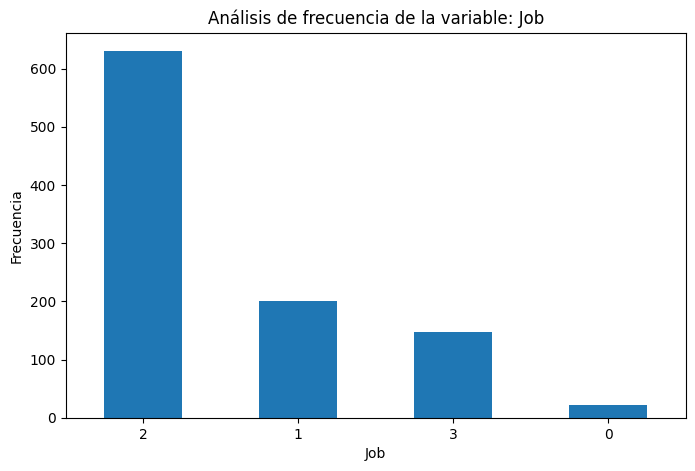

In [10]:
# Analizamos la variable job que en el anterior caso no lo realizamos dado que parece ser categórica.
# Esto mismo se puede hacer para el resto de las variables.
jobCounts = df['Job'].value_counts(dropna=False)

# Gráfico de barras
plt.figure(figsize=(8, 5))
jobCounts.plot(kind='bar')
plt.title(f'Análisis de frecuencia de la variable: Job')
plt.xlabel('Job')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

Variables categóricas:  ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'] 



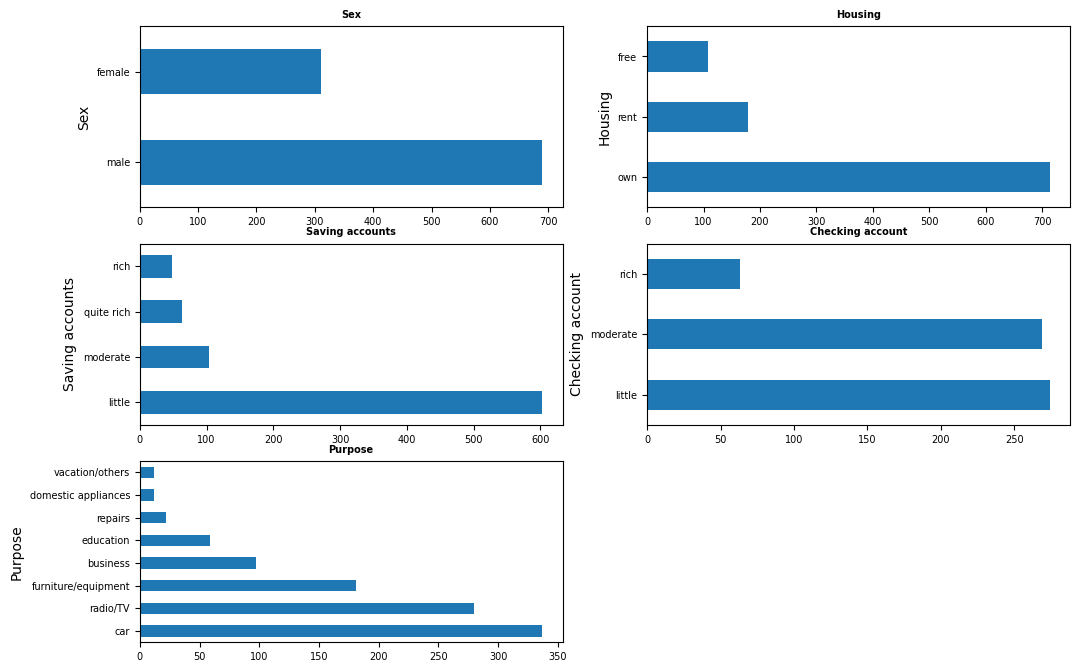

In [11]:
# Hacemos este gráfico para el resto de las variables cualitativas:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
cat_cols.remove('Risk')
print("Variables categóricas: ", cat_cols, "\n")

# Definimos la forma de los subplots y el tamaño de la figura que vamos a graficar
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
axes = axes.flat

# Hacemos un for con la función enumerate (para obtener tanto el indice como la lista)
for i, column in enumerate(cat_cols):
    df[column].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(column, fontsize = 7, fontweight = "bold") 
    axes[i].tick_params(labelsize = 7)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
fig.delaxes(axes[5])

##### Nota de variables categóricas:

Siempre es importante notar si tenemos algunos grupos que contenga muy pocas observaciones. Eso podría alterar las decisiones que toma el modelo y mismo también podría verse afectado nuestros procesos de validación de datos. En estos casos siempre es importante, eliminar esas observaciones de los grupos con muy pocos datos o, en caso que tengamos una variable con solo dos grupos podríamos eliminarla por completo.

Otra decisión podría ser, por ejemplo en "saving accounts" y suponiendo que la diferencia entre el grupo "little" y el resto sea aún más marcada, podríamos agrupar el resto de los grupos para que cobrasen mayor importancia.

##### Análisis univariado de variable numéricas:

Las variables numeríca si estan altamente relacionadas con el tipo de dato que tenemos en el dataframe dado que, basicamente, pueden tomar infinitos valores (obviamente dentro de un dominio de valores coherente dada la variable). El objetivo del análisis univariado de variables numéricas es el de obtener diversas medidas estadísticas que nos pueden aportar valor al análisis para luego tomar decisiones.

En este caso se realizará el análisis pero si existe la necesidad de repasar conceptos como: Distribuciones, percentiles, curtosis, asimetrías, desvíos estandar, etc; se recomienda pasar por el repositorio de "*finance_fundamentals*":

* https://github.com/LautaroPintos/finance_fundamentals/blob/main/notebooks/2_intro_probabilidad.ipynb
* https://github.com/LautaroPintos/finance_fundamentals/blob/main/notebooks/3_finance_risk_stats.ipynb

Algo importante que tenemos que tener presente en estos casos es la documenteación de la librería de seaborn para la creación de histogramas como también la documentación de la librería de matplotlib para crear subplots. Ambas documentaciones son:

* https://seaborn.pydata.org/generated/seaborn.histplot.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

Adicionalmente, acá hay otro ejemplo más intuitivo de como asignar distintos tipos de gráficos a cada sublplot:

* https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_star_poly.html#sphx-glr-gallery-lines-bars-and-markers-scatter-star-poly-py

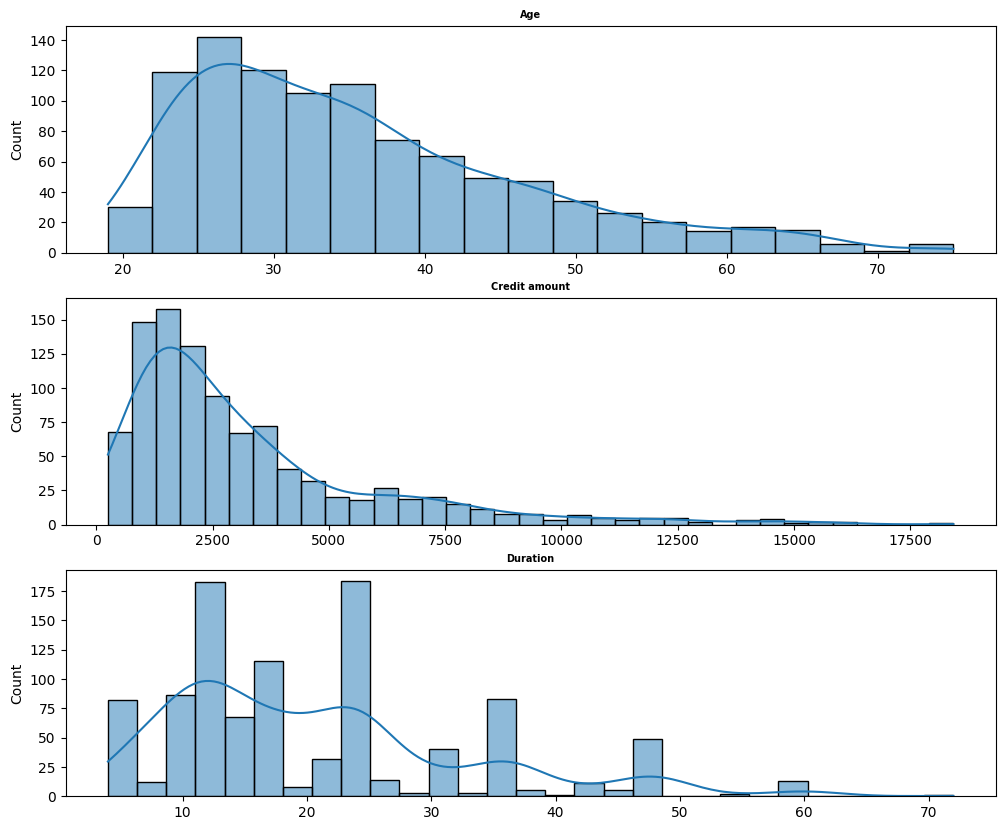

In [12]:
# Hacemos un análisis de las distribuciones del conjunto de datos.
cols = df.select_dtypes(include=['float64', 'int']).columns
cols = cols.drop('Job')

# Definimos la forma de los subplots y el tamaño de la figura que vamos a graficar
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

# Hacemos un for con la función enumerate (para obtener tanto el indice como la lista)
for i, column in enumerate(cols):
    sns.histplot(data=df, x=column, stat='count', kde=True, ax = axes[i])
    axes[i].set_title(column, fontsize = 7, fontweight = "bold") 
    axes[i].set_xlabel("")

In [13]:
# Ahora que graficamente vemos el comportamiento univariado de las variables numéricas podemos profundizar el análisis:

# Vemos cuales son los valores de durations que tienen una frecuencia mayor a 100 observaciones. Esto lo podemos hacer así
# dado que pareciera tener un comportamiento multimodal (o ser más parecida a una variable con muchas categorías)
duration = df.groupby(['Duration']).size().reset_index(name='count')
dur_analysis = duration[duration['count'] > 100]
print(dur_analysis)
print('\n')

# En el caso de credit amount podríamos ver cual es el percentil 50 y 90 de la distribución:
# Si bien es bastante claro, se evidencia acá una cola bastante larga hacia la derecha
credit_quantile = np.percentile(df['Credit amount'], [50, 90])
print('Percentil 50 (Mediana) Credit amount: ' + str(credit_quantile[0]))
print('Percentil 90           Credit amount: ' + str(credit_quantile[1]))

    Duration  count
8         12    179
13        18    113
17        24    184


Percentil 50 (Mediana) Credit amount: 2319.5
Percentil 90           Credit amount: 7179.4000000000015


##### Nota de variables numéricas:

Existen muchas formas más de explotar y representar los datos que se verán más adelante a medida que comencemos a trabjar la data. En este punto, el análisis univariado tiene el objetivo de poder tener una idea de con que data estamos trabajando para luego sí, hacer el procesamiento.

##### Análisis de la variable dependiente.

En particular, cuando estamos intentando predecir el comportamiento de una variable y, en particular, de clasificación binaria tenemos que hacer un análisis más puntilloso de la variable dependiente del modelo con el objetivo de entender su comportamiento. Como encaramos este tipo de análisis va a depender del tipo de variable que tengamos:

* Variable discreta (modelos de clasificación binaria)
* Variable continua

En ambos casos, el análisis que se realiza es sobre la distribución de la variable. Este análisis puede ser muy distintos si la variable es discreta o continua dado que en este último caso podemos encontrar una distribución conocida para asociar los datos ¿Por qué es importante esto? Porque algunos modelos nos exigen cierto comportamiento de nuestra variable target. Por ejemplo, los modelos de regresión lineal exigen que la variable se distribuya como una normal para que se cumplan los supuestos de gauss markov

/tmp/ipykernel_8903/3220350705.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x="Risk", stat='percent', palette=['#1f77b4', '#ff7f0e'])


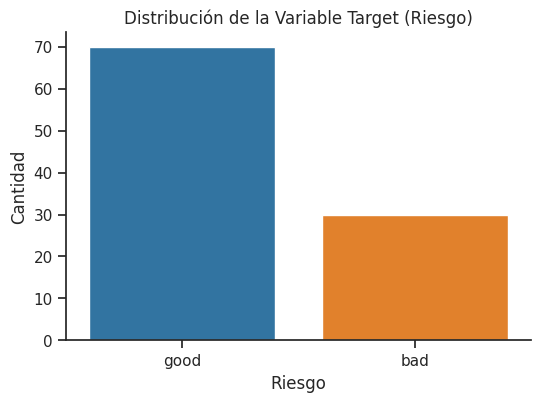

In [44]:
# Realizamos un gráfico de la variable dependiente. Este gráfico nos habla de una tasa de mora bastante elevada
# pero en nuestro dataset no sabemos de que ventana temporal estamos analizando.
plt.figure(figsize=(6, 4))
sns.countplot(df, x="Risk", stat='percent', palette=['#1f77b4', '#ff7f0e'])

# Añadimos títulos y etiquetas para hacer el gráfico más informativo
plt.title('Distribución de la Variable Target (Riesgo)')
plt.xlabel('Riesgo')
plt.ylabel('Cantidad')

# Mostramos el gráfico
plt.show()

In [16]:
# Análisis bivariado y multivariado

In [25]:
# Análisis bivariados respecto a la variable objetivo

In [27]:
# Análisis de bivariados de tendencia (Vieja usanza)

#### Data Preprocessing

In [17]:
# Manejo de tipos de datos

In [18]:
# Maniejo  de nulos

In [19]:
# Manejo de outliers

In [20]:
# Estandarizacion

In [21]:
# Discretización de variables numéricas

In [22]:
# Variables de alta cardinalidad

In [23]:
# Anáisis de correlaciones

In [28]:
# Selección de variables (Gráficos bivariados , graficos de tendencia y algorítmos de selección de variables)